## Guest Lecture COMP7230
# Using Python packages for spatial Linked Data data
#### by Dr Nicholas Car

This Notebook is the resource used to deliver a guest lecture for the [Australian National University](https://www.anu.edu.au)'s course [COMP7230](https://programsandcourses.anu.edu.au/2020/course/COMP7230): *Introduction to Programming for Data Scientists*

Click here to run this lecture in your web browser:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nicholascar/comp7230-training/HEAD?filepath=lecture_01.ipynb)

## About the lecturer
**Nicholas Car**:
* PhD in informatics for irrigation
* A former CSIRO informatics researcher
    * worked on integrating environmental data across government / industry
    * developed data standards
* Has worked in operational IT in government
* Now runs a private IT consulting company, [KurrawongAI](https://kurrawong.ai) supplying Data Science solutions

Relevant current work:

* building data processing systems for government & industry
* mainly using Python
    * due to its large number of web and data science packages
* maintains the [RDFlib](https://rdflib.net) Python toolkit
    * for processing [RDF](https://en.wikipedia.org/wiki/Resource_Description_Framework)
* co-chairs the [Australian Government Linked Data Working Group](https://www.linked.data.gov.au)
    * plans for multi-agency data integration
* still developing data standards
    * in particular [GeoSPARQL 1.1](https://opengeospatial.github.io/ogc-geosparql/geosparql11/spec.html)
        * for graph representations of spatial information


## 0. Lecture Outline
1. Notes about this training material
2. Accessing RDF data
3. Parsing RDF data
4. Data 'mash up'
5. Data Conversions & Display


## 1. Notes about this training material

#### This tool
* This is a Jupyter Notebook - interactive Python scripting
* You will cover Jupyter Notebooks more, later in this course
* Access this material online at:
    * GitHub: <https://github.com/nicholascar/comp7230-training>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nicholascar/comp7230-training/?filepath=lecture_01.ipynb)

#### Background data concepts - RDF

_Nick will talk about RDF using these web pages:_

* [Semantic Web](https://www.w3.org/standards/semanticweb/) - the concept
* [RDF](https://en.wikipedia.org/wiki/Resource_Description_Framework) - the data model
    * refer to the RDF image below
* [RDFlib](https://rdflib.net) - the (Python) toolkit
* [RDFlib training Notebooks are available](https://github.com/surroundaustralia/rdflib-training)

The LocI & FSDF DAA projects:
* The Location Index project: <https://www.ga.gov.au/locationindex>
* FSDF DAA's "Supermodel"
    * <https://geoscienceaustralia.github.io/fsdf-supermodel/supermodel.html>
* Knowledge Graph spatial data: [GeoSPARQL](https://opengeospatial.github.io/ogc-geosparql/geosparql11/spec.html#_core)
* Operational APIs:
    * CAPAD202: <https://data.idnau.org/pid/capad2020>
    * ASGS: <https://asgs.linked.fsdf.org.au/dataset/asgsed3/collections>
    * GNAF: <https://gnaf.linked.fsdf.org.au/dataset/gnaf/collections>
    * there are others too!

RDF image, from [the RDF Primer](https://www.w3.org/TR/rdf11-primer/), for discussion:

![](./lecture_resources/img/example-graph-iris.jpg)

Note that:
* _everything_ is "strongly" identified
    * including all relationships
    * unlike lots of related data
* many of the identifiers resolve
    * to more info on the web

## 2. Accessing RDF data

* Here we use an online structured dataset, the Geocoded National Address File for Australia
    * Dataset Persistent Identifier: <https://gnaf.linked.fsdf.org.au/dataset/gnaf/collections/address>
* GNAF-LD Data is presented according to *Linked Data* principles
    * online
    * in HTML & machine-readable form, RDF
    * RDF is a Knowledge Graph: a graph containing data + model
    * each resource is available via a IRI
        * e.g. <https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933>

![GAACT714845933](./lecture_resources/img/GAACT714845933.png)


### 2.1. Use local RDF data

RDF can be stored in files in multiple formats optimised for different purposes.

A commonly-used format is JSON-LD - a JSON encoding of RDF. Let's parse a JSON-LD data file for the address GAACT714845933 into an in-memory graph and print out the number of triples.

In [1]:
from rdflib import Graph
g = Graph().parse("./lecture_resources/GAACT714845933.json-ld", format="json-ld")
print(f"No of triples parsed: {len(g)}")


No of triples parsed: 48


### 2.2. Get Address GAACT714845933 data online using the *httpx* package

In [2]:
import httpx
r = httpx.get(
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933",
    follow_redirects=True
)
print(r.text.strip())

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <!-- standard Prez stylesheet -->
    <link rel="stylesheet" href="/static/css/prez.css">
    <!-- if a theme is set, also load it's favicon & stylesheet -->
    
        <link rel="stylesheet" href="/theme/css/theme.css">
        
            <link rel="shortcut icon" href="/static/img/favicon.ico" type="image/x-icon">
        
        
    
    <script src="https://kit.fontawesome.com/c112c4b9c0.js" crossorigin="anonymous"></script>
    <title>Geocoded National Address File Linked Data API</title>
</head>
<body>
    <header>
    <div id="header-content">
        <h1>Geocoded National Address File Linked Data API</h1>
    </div>
</header>
    <div id="breadcrumbs">
    <div id="breadcrumbs-container">
        
        <ol id="breadcrumbs-content">
            <li class="breadcrumb"><a

Not so easy to use the HTML we got above!

### 2.3 Get machine-readable data, RDF in JSON-LD
Use HTTP Content Negotiation
Same IRI, different *format* of data

In [3]:
r = httpx.get(
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933",
    headers={"Accept": "application/ld+json"},
    follow_redirects=True
)
print(r.text)

[
  {
    "@id": "http://www.opengis.net/ont/geosparql#hasGeometry",
    "http://purl.org/dc/terms/description": [
      {
        "@language": "en",
        "@value": "A spatial representation for a given Feature."
      }
    ],
    "http://www.w3.org/2000/01/rdf-schema#label": [
      {
        "@language": "en",
        "@value": "has geometry"
      }
    ]
  },
  {
    "@id": "https://linked.data.gov.au/dataset/gnaf/locality/locba032712915d",
    "http://www.w3.org/2000/01/rdf-schema#label": [
      {
        "@value": "Charnwood"
      }
    ]
  },
  {
    "@id": "https://linked.data.gov.au/dataset/asgsed3/MB/80006300000",
    "http://www.w3.org/2000/01/rdf-schema#label": [
      {
        "@value": "Mesh Block 80006300000"
      }
    ]
  },
  {
    "@id": "http://www.opengis.net/ont/geosparql#sfWithin",
    "http://purl.org/dc/terms/description": [
      {
        "@language": "en",
        "@value": "States that the subject SpatialObject is spatially within the object Spatial

Let's get a different RDF format...

### 2.4 Get machine-readable data, Turtle. Easier to read

In [4]:
r = httpx.get(
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933",
    headers={"Accept": "text/turtle"},
    follow_redirects=True
)
print(r.text)

@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix geo: <http://www.opengis.net/ont/geosparql#> .
@prefix gnaf: <https://linked.data.gov.au/dataset/gnaf/> .
@prefix ns1: <http://w3id.org/profile/anz-address/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

dcterms:identifier rdfs:label "Identifier"@en ;
    dcterms:description "Recommended practice is to identify the resource by means of a string conforming to an identification system. Examples include International Standard Book Number (ISBN), Digital Object Identifier (DOI), and Uniform Resource Name (URN).  Persistent identifiers should be provided as HTTP URIs."@en .

dcterms:title rdfs:label "Title" .

geo:hasGeometry rdfs:label "has geometry"@en ;
    dcterms:description "A spatial representation for a given Feature."@en .

geo:sfWithin rdfs:label "within"@en ;

## 3. Parsing RDF data

Import the RDFlib library for manipulating RDF data
Add some namespaces to shorten IRIs

In [5]:
import rdflib
from rdflib.namespace import DCTERMS, GEO, RDF, RDFS
ADDR = rdflib.Namespace("http://w3id.org/profile/anz-address/")
print(GEO)

http://www.opengis.net/ont/geosparql#


Create a graph and add the namespaces to it

In [6]:
g = rdflib.Graph(bind_namespaces="core") # RDF & RDFS added
g.bind("addr", ADDR)
g.bind("geo", GEO)
print(g)

[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'Memory']].


Parse in the machine-readable data - JSON-LD RDF - from the GNAF online

In [7]:
r = httpx.get(
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933",
    headers={"Accept": "application/ld+json"},
    follow_redirects=True
)
print(r.text)
g.parse(data=r.text, format="json-ld")
print(len(g))

[
  {
    "@id": "http://www.opengis.net/ont/geosparql#hasGeometry",
    "http://purl.org/dc/terms/description": [
      {
        "@language": "en",
        "@value": "A spatial representation for a given Feature."
      }
    ],
    "http://www.w3.org/2000/01/rdf-schema#label": [
      {
        "@language": "en",
        "@value": "has geometry"
      }
    ]
  },
  {
    "@id": "https://linked.data.gov.au/dataset/gnaf/locality/locba032712915d",
    "http://www.w3.org/2000/01/rdf-schema#label": [
      {
        "@value": "Charnwood"
      }
    ]
  },
  {
    "@id": "https://linked.data.gov.au/dataset/asgsed3/MB/80006300000",
    "http://www.w3.org/2000/01/rdf-schema#label": [
      {
        "@value": "Mesh Block 80006300000"
      }
    ]
  },
  {
    "@id": "http://www.opengis.net/ont/geosparql#sfWithin",
    "http://purl.org/dc/terms/description": [
      {
        "@language": "en",
        "@value": "States that the subject SpatialObject is spatially within the object Spatial

Print graph content, in Turtle format

In [8]:
print(g.serialize())

@prefix addr: <http://w3id.org/profile/anz-address/> .
@prefix geo: <http://www.opengis.net/ont/geosparql#> .
@prefix ns1: <http://purl.org/dc/terms/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ns1:identifier rdfs:label "Identifier"@en ;
    ns1:description "Recommended practice is to identify the resource by means of a string conforming to an identification system. Examples include International Standard Book Number (ISBN), Digital Object Identifier (DOI), and Uniform Resource Name (URN).  Persistent identifiers should be provided as HTTP URIs."@en .

ns1:title rdfs:label "Title" .

geo:hasGeometry rdfs:label "has geometry"@en ;
    ns1:description "A spatial representation for a given Feature."@en .

geo:sfWithin rdfs:label "within"@en ;
    ns1:description "States that the subject SpatialObject is spatially within the object SpatialObject. DE-9IM: T*F**F***

### 3.1 Getting multi-address data:
3.1.1. Retrieve a list of 20 addresses, in RDF
3.1.2. For each address in the list, get each Address' data
3.1.3. Get only the street address and map coordinates

* The GNAF has ~14.5M Addresses in it
* The Linked Data APIs we are using page data: <http://gnaf.linked.fsdf.org.au/dataset/gnaf/collections/address/items?page=1>

#### 3.1.1. Retrieve list (a page)

In [9]:
# clear the graph
g = rdflib.Graph()

r = httpx.get(
    "http://gnaf.linked.fsdf.org.au/dataset/gnaf/collections/address/items?_profile=mem&_mediatype=text/turtle",
    headers={"Accept": "text/turtle"},
    follow_redirects=True
)
g.parse(data=r.text)
print(len(g))

43


Show the IDs of first few by looping through the graph

In [10]:
for i, t in enumerate(g.triples((None, RDFS.member, None))):
    print(f'Address {i+1}: {t[2].split("/")[-1]}')
    if i > 4:
        break

Address 1: GANSW704380494
Address 2: GANSW705458161
Address 3: GANSW705530989
Address 4: GANSW705866516
Address 5: GANSW705877974
Address 6: GANSW706038728


#### 3.1.2. For each address in the list, get each Address' data

For each Address, retrieve it's RDF from the API online. Join it with some testing data we have locally too.

In [11]:
import rdflib
g = rdflib.Graph()
g.bind("addr", ADDR)
g.bind("geo", GEO)

g.parse("./lecture_resources/address_geometries.ttl")

addresses = [
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845944",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845934",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845943",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845949",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845955",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845935",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845947",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845950",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845953",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845945",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845946",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845939",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845941",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845942",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845954",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845952",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845938",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845936",
    "https://linked.data.gov.au/dataset/gnaf/address/GAACT714845951",
]
for address in addresses:
    r = httpx.get(
        address,
        headers={"Accept": "text/turtle"},
        follow_redirects=True
    )
    g.parse(data=r.text, format="turtle")
    print(f"Getting {address}...")
    print(len(g))

Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845944...
148
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845934...
180
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845943...
211
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845949...
240
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845955...
271
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845935...
300
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845947...
329
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845950...
358
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845933...
389
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845953...
419
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845945...
448
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714845946...
477
Getting https://linked.data.gov.au/dataset/gnaf/address/GAACT714

The graph model used by the GNAF-LD is based on [GeoSPARQL 1.1](https://opengeospatial.github.io/ogc-geosparql/geosparql11/spec.html) and looks like this:

![](./lecture_resources/img/geosparql-model.png)

#### 3.1.3. Extract (& print) street address text & coordinates
(CSV)

In [12]:
addresses_tsv = "GNAF ID\tCoordinates\n"
for s, p, o in g.triples((None, RDF.type, ADDR.Address)):
    id = g.value(s, DCTERMS.identifier)
    coords = ""
    for s2, p2, o2 in g.triples((s, ADDR.hasQualifiedGeometry, None)):
        for s3, p3, o3 in g.triples((o2, GEO.hasGeometry, None)):
            for s4, p4, o4 in g.triples((o3, GEO.asWKT, None)):
                coords = str(o4).strip()

    addresses_tsv += "{}\t{}\n".format(id, coords)

print(addresses_tsv)

GNAF ID	Coordinates
GAACT714845944	POINT (149.0687229 -35.37847955)
GAACT714845934	POINT (149.0401187 -35.19989093)
GAACT714845943	POINT (149.0368852 -35.19795303)
GAACT714845949	POINT (149.06908395 -35.37882495)
GAACT714845955	POINT (149.03046282 -35.20202762)
GAACT714845935	POINT (149.03640841 -35.19777173)
GAACT714845947	POINT (149.03705032 -35.19796828)
GAACT714845950	POINT (149.03049843 -35.20169346)
GAACT714845933	POINT (149.03865604 -35.20113263)
GAACT714845953	POINT (149.06864966 -35.37733591)
GAACT714845945	POINT (149.03047333 -35.20156767)
GAACT714845946	POINT (149.06895786 -35.37862878)
GAACT714845939	POINT (149.03661902 -35.19784933)
GAACT714845941	POINT (149.06860919 -35.37833726)
GAACT714845942	POINT (149.04029706 -35.19999611)
GAACT714845954	POINT (149.03048051 -35.20185603)
GAACT714845952	POINT (149.03721725 -35.19805563)
GAACT714845938	POINT (149.06851657 -35.37815855)
GAACT714845936	POINT (149.03687042 -35.2039574)
GAACT714845951	POINT (149.06946494 -35.37908886)



#### 3.1.4. Convert CSV data to PANDAS DataFrame
(CSV)

In [13]:
import pandas
from io import StringIO
s = StringIO(addresses_tsv)
df1 = pandas.read_csv(s, sep="\t")
print(df1)


           GNAF ID                        Coordinates
0   GAACT714845944   POINT (149.0687229 -35.37847955)
1   GAACT714845934   POINT (149.0401187 -35.19989093)
2   GAACT714845943   POINT (149.0368852 -35.19795303)
3   GAACT714845949  POINT (149.06908395 -35.37882495)
4   GAACT714845955  POINT (149.03046282 -35.20202762)
5   GAACT714845935  POINT (149.03640841 -35.19777173)
6   GAACT714845947  POINT (149.03705032 -35.19796828)
7   GAACT714845950  POINT (149.03049843 -35.20169346)
8   GAACT714845933  POINT (149.03865604 -35.20113263)
9   GAACT714845953  POINT (149.06864966 -35.37733591)
10  GAACT714845945  POINT (149.03047333 -35.20156767)
11  GAACT714845946  POINT (149.06895786 -35.37862878)
12  GAACT714845939  POINT (149.03661902 -35.19784933)
13  GAACT714845941  POINT (149.06860919 -35.37833726)
14  GAACT714845942  POINT (149.04029706 -35.19999611)
15  GAACT714845954  POINT (149.03048051 -35.20185603)
16  GAACT714845952  POINT (149.03721725 -35.19805563)
17  GAACT714845938  POINT (1

#### 3.1.5. SPARQL querying RDF data
A graph query, similar to a database SQL query, can traverse the graph and retrieve the same details as the multiple
loops and Python code above in 3.1.3.

In [14]:
q = """
PREFIX addr: <http://w3id.org/profile/anz-address/>
SELECT ?id ?coords
WHERE {
    ?iri dcterms:identifier ?id .

    ?iri addr:hasQualifiedGeometry/geo:hasGeometry/geo:asWKT ?coords .
}
ORDER BY ?id
"""
for r in g.query(q):
    print("{}, {}".format(r["id"], r["coords"]))

GAACT714845933, POINT (149.03865604 -35.20113263)
GAACT714845934, POINT (149.0401187 -35.19989093)
GAACT714845935, POINT (149.03640841 -35.19777173)
GAACT714845936, POINT (149.03687042 -35.2039574)
GAACT714845938, POINT (149.06851657 -35.37815855)
GAACT714845939, POINT (149.03661902 -35.19784933)
GAACT714845941, POINT (149.06860919 -35.37833726)
GAACT714845942, POINT (149.04029706 -35.19999611)
GAACT714845943, POINT (149.0368852 -35.19795303)
GAACT714845944, POINT (149.0687229 -35.37847955)
GAACT714845945, POINT (149.03047333 -35.20156767)
GAACT714845946, POINT (149.06895786 -35.37862878)
GAACT714845947, POINT (149.03705032 -35.19796828)
GAACT714845949, POINT (149.06908395 -35.37882495)
GAACT714845950, POINT (149.03049843 -35.20169346)
GAACT714845951, POINT (149.06946494 -35.37908886)
GAACT714845952, POINT (149.03721725 -35.19805563)
GAACT714845953, POINT (149.06864966 -35.37733591)
GAACT714845954, POINT (149.03048051 -35.20185603)
GAACT714845955, POINT (149.03046282 -35.20202762)


The query above uses a fancy 'path follower' clause: `addr:hasQualifiedGeometry/geo:hasGeometry/geo:asWKT`

## 4. Data 'mash up'
Add some fake data to the GNAF data - people count per address.

The GeoSPARQL model extension used is:

![](./lecture_resources/img/geosparql-model-extension.png)

Note that for real Semantic Web work, the `xxx:` properties and classes would be "properly defined", removing any ambiguity of use.

In [15]:
import pandas
df2 = pandas.read_csv('./lecture_resources/fake_data.csv')
print(df2)

           GNAF ID   Persons
0   GAACT714845944         3
1   GAACT714845934         5
2   GAACT714845943        10
3   GAACT714845949         1
4   GAACT714845955         2
5   GAACT714845935         1
6   GAACT714845947         4
7   GAACT714845950         3
8   GAACT714845933         4
9   GAACT714845953         2
10  GAACT714845945         3
11  GAACT714845946         3
12  GAACT714845939         4
13  GAACT714845941         2
14  GAACT714845942         1
15  GAACT714845954         0
16  GAACT714845952         5
17  GAACT714845938         3
18  GAACT714845936         4
19  GAACT714845951         3


Merge DataFrames

In [16]:
df3 = pandas.merge(df1, df2)
print(df3.head())

          GNAF ID                        Coordinates   Persons
0  GAACT714845944   POINT (149.0687229 -35.37847955)         3
1  GAACT714845934   POINT (149.0401187 -35.19989093)         5
2  GAACT714845943   POINT (149.0368852 -35.19795303)        10
3  GAACT714845949  POINT (149.06908395 -35.37882495)         1
4  GAACT714845955  POINT (149.03046282 -35.20202762)         2


## 5. Spatial Data Conversions & Display

Often you will want to display or export data.

#### 5.1 Display directly in Jupyter
Using standard Python plotting (matplotlib).

First, extract addresses, longitudes & latitudes into a dataframe using a SPARQL query to build a CSV string.

In [17]:
import re
addresses_csv = "id,lon,lat\n"

q = """
    PREFIX addr: <http://w3id.org/profile/anz-address/>
    SELECT ?id ?coords
    WHERE {
        ?iri dcterms:identifier ?id .

        ?iri addr:hasQualifiedGeometry/geo:hasGeometry/geo:asWKT ?coords .
    }
    ORDER BY ?id
    """
for r in g.query(q):
    match = re.search("POINT\s\((\d+\.\d+)\s(\-\d+\.\d+)\)", r["coords"])
    long = float(match.group(1))
    lat = float(match.group(2))
    addresses_csv += f'\"{r["id"]}\",{long},{lat}\n'

print(addresses_csv)

id,lon,lat
"GAACT714845933",149.03865604,-35.20113263
"GAACT714845934",149.0401187,-35.19989093
"GAACT714845935",149.03640841,-35.19777173
"GAACT714845936",149.03687042,-35.2039574
"GAACT714845938",149.06851657,-35.37815855
"GAACT714845939",149.03661902,-35.19784933
"GAACT714845941",149.06860919,-35.37833726
"GAACT714845942",149.04029706,-35.19999611
"GAACT714845943",149.0368852,-35.19795303
"GAACT714845944",149.0687229,-35.37847955
"GAACT714845945",149.03047333,-35.20156767
"GAACT714845946",149.06895786,-35.37862878
"GAACT714845947",149.03705032,-35.19796828
"GAACT714845949",149.06908395,-35.37882495
"GAACT714845950",149.03049843,-35.20169346
"GAACT714845951",149.06946494,-35.37908886
"GAACT714845952",149.03721725,-35.19805563
"GAACT714845953",149.06864966,-35.37733591
"GAACT714845954",149.03048051,-35.20185603
"GAACT714845955",149.03046282,-35.20202762



Read the CSV into a DataFrame.

In [18]:
import pandas as pd
from io import StringIO
addresses_df = pd.read_csv(StringIO(addresses_csv))

print(addresses_df.head())

               id         lon        lat
0  GAACT714845933  149.038656 -35.201133
1  GAACT714845934  149.040119 -35.199891
2  GAACT714845935  149.036408 -35.197772
3  GAACT714845936  149.036870 -35.203957
4  GAACT714845938  149.068517 -35.378159


Display the address locations on a map using geoplotlib

In [20]:
import geoplotlib
from geoplotlib.utils import BoundingBox

geoplotlib.dot(addresses_df)
geoplotlib.show()

after

KeyError: 'Longitude'

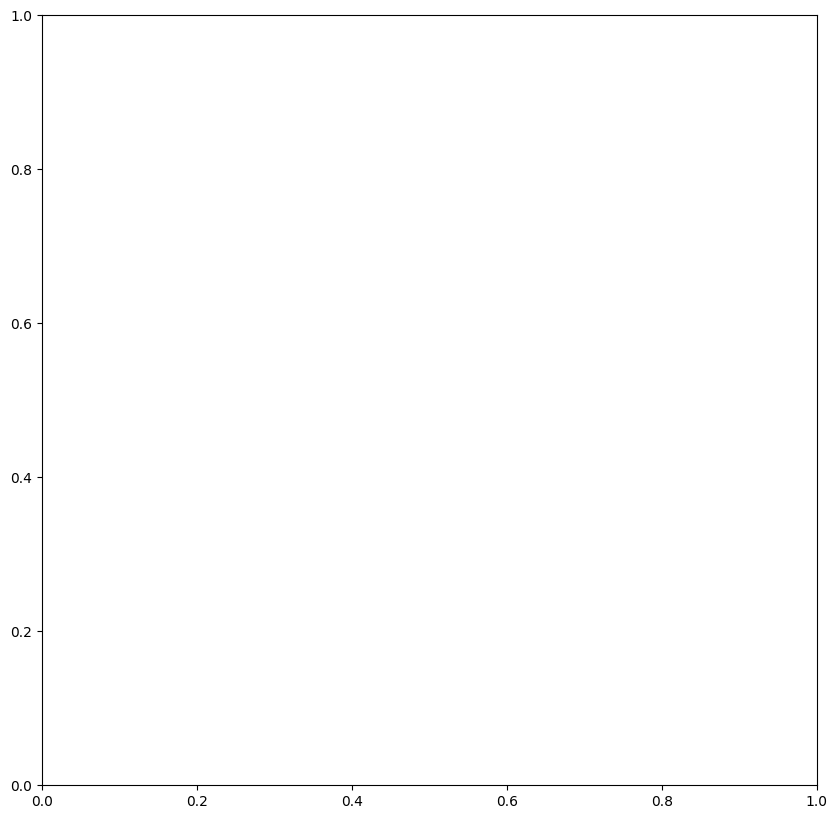

In [21]:
from matplotlib import pyplot as plt

addresses_df[:5].plot(kind="scatter", x="lon", y="lat", s=50, figsize=(10,10))

for i, label in enumerate(addresses_df[:5]):
    plt.annotate(addresses_df["Address"][i], (addresses_df["Longitude"][i], addresses_df["Latitude"][i]))
    
plt.show()

#### 5.2 Convert to common format - GeoJSON

Import Python conversion tools (shapely).

In [ ]:
import shapely.wkt
from shapely.geometry import MultiPoint
import json

Loop through the graph using ordinary Python loops, not a query.

In [ ]:
points_list = []

for s, p, o in g.triples((None, RDF.type, ADDR.Address)):
    for s2, p2, o2 in g.triples((s, GEO.hasGeometry, None)):
        for s3, p3, o3 in g.triples((o2, GEO.asWKT, None)):
            points_list.append(
                shapely.wkt.loads(str(o3).replace("<http://www.opengis.net/def/crs/EPSG/0/4283> ", ""))
            )

mp = MultiPoint(points=points_list)

geojson = shapely.geometry.mapping(mp)
print(json.dumps(geojson, indent=4))

Another, better, GeoJSON export - including Feature information.

First, build a Python dictionary matching the GeoJSON specification, then export it to JSON.

In [ ]:
geo_json_features = []

# same query as above
for r in g.query(q):
    match = re.search("POINT\((\d+\.\d+)\s(\-\d+\.\d+)\)", r["coords"])
    long = float(match.group(1))
    lat = float(match.group(2))
    geo_json_features.append({
        "type": "Feature", 
        "properties": { "name": r["addr"] },
        "geometry": { 
            "type": "Point", 
            "coordinates": [ long, lat ] 
        } 
    })
    
geo_json_data = {
    "type": "FeatureCollection",
    "name": "test-points-short-named",
    "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
    "features": geo_json_features
}

import json
geo_json = json.dumps(geo_json_data, indent=4)
print(geo_json)

Export the data and view it in a GeoJSON map viewer, such as http://geojsonviewer.nsspot.net/ or QGIS (desktop_.

## Concluding remarks

* Semantic Web, realised through Linked Data, builds a global machine-readable data system
* the RDF data structure is used
    * to link things
    * to define things, and the links
* specialised parts of the Sem Web can represent a/any domain
    * e.g. spatial
    * e.g. Addresses
* powerful graph pattern matching queries, SPARQL, can be used to subset (federated) Sem Web data
* RDF manipulation libraries exist
    * can convert to other, common forms, e.g. CSV GeoJSON
* _do as much data science work as you can with well-defined models!_

## License
All the content in this repository is licensed under the [CC BY 4.0 license](https://creativecommons.org/licenses/by/4.0/). Basically, you can:

* copy and redistribute the material in any medium or format
* remix, transform, and build upon the material for any purpose, even commercially

You just need to:

* give appropriate credit, provide a link to the license, and indicate if changes were made
* not apply legal terms or technological measures that legally restrict others from doing anything the license permits

## Contact Information
**Dr Nicholas J. Car**<br />
*Data Systems Architect*<br />
[SURROUND Australia Pty Ltd](https://surroundaustralia.com)<br />
<nicholas.car@surroundaustralia.com><br />
GitHub: [nicholascar](https://github.com/nicholascar)<br />
ORCID: <https://orcid.org/0000-0002-8742-7730><br />